In [1]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import pandas_datareader as pdr
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, save_image, generate_bollinger_bands, generate_ifr, generate_macd, generate_mme, generate_mme_label, generate_mms, generate_mms_label, generate_label

### Others
import warnings

#### Loading Data

In [2]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')
df_ticker['date'] = pd.to_datetime(df_ticker['date'])

#### Implementing Technical Indicators

In [149]:
fig = go.Figure(data = go.Ohlc(
    x = df_ticker.date,
    open = df_ticker.open,
    high = df_ticker.high,
    low = df_ticker.low,
    close = df_ticker.close
))
fig.show()

In [3]:
### Médias móveis simples
df_ticker = generate_mms(df_ticker, 15)
df_ticker = generate_mms(df_ticker, 30)
df_ticker = generate_mms_label(df_ticker, mms_short_collumn = 'mms_15', mms_long_column = 'mms_30')

### Médias Móveis Exponenciais
df_ticker = generate_mme(df_ticker, 50)
df_ticker = generate_mme(df_ticker, 200)

### Proximidade das Médias Móveis Exponenciais
df_ticker = generate_mme_label(df_ticker, 1.2, 0.8, 200)
df_ticker = generate_mme_label(df_ticker, 1.2, 0.6, 200)

### Bollinger Bands
df_ticker = generate_bollinger_bands(df_ticker, n_days = 20)

### Índice de Força Relativa
df_ticker = generate_ifr(df_ticker, n_days = 14)

### Convergência-Divergência Da Média Móvel (MACD)
df_ticker = generate_macd(df_ticker, fastperiod=12, slowperiod=26, signalperiod=9)

### Estocastico
df_ticker['%_k'], df_ticker['%D'] = talib.STOCH(df_ticker.high, df_ticker.low, df_ticker.close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

### Double Exponential Moving Average
df_ticker['dema']= talib.DEMA(df_ticker.close, timeperiod=30)

### Momentum
df_ticker['momentum']= talib.MOM(df_ticker.close, timeperiod=10)

### Rate of Change
df_ticker['roc']= talib.ROC(df_ticker.close, timeperiod=10)

In [4]:
df_ticker = generate_label(3, df_ticker)
df_ticker = generate_label(5, df_ticker)
df_ticker = generate_label(7, df_ticker)
df_ticker = generate_label(15, df_ticker)
df_ticker = generate_label(30, df_ticker)

In [90]:
### Saving processed data
path = 'data\\processed'
df_ticker.to_csv(f"{chose_path_to_work(path)}\\{ticker}_processed.csv", index = False)

'c:\\Users\\Guilherme\\Desktop\\Guilherme\\TCC\\tcc-machine-learning\\data\\processed'

<AxesSubplot:title={'center':'Estocastico'}, xlabel='date'>

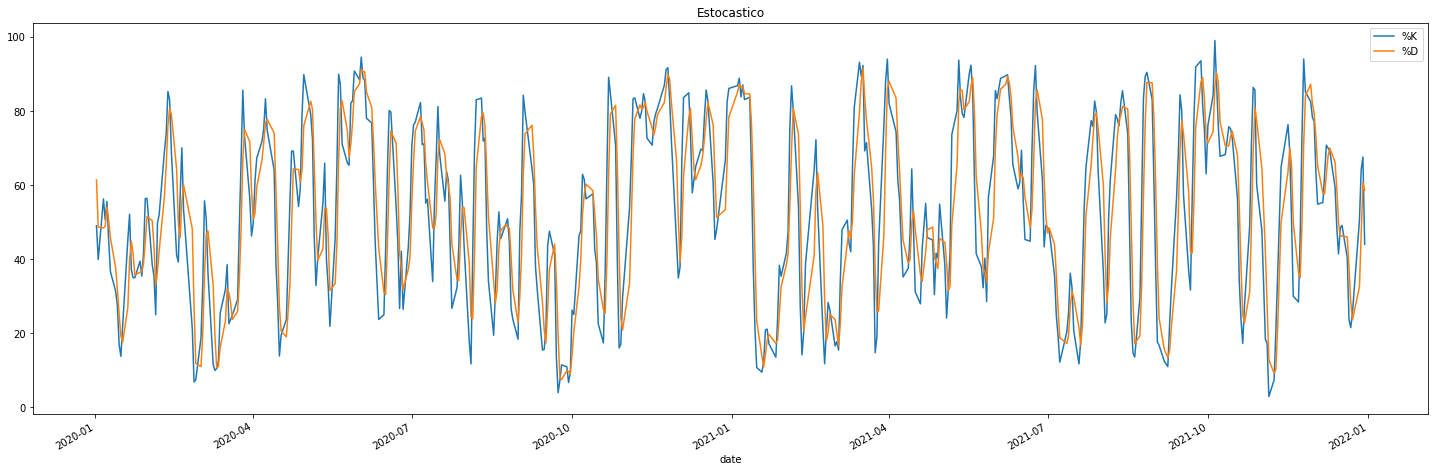

In [39]:
df_ticker[['date', '%K', '%D']].loc[df_ticker['date'] >= '2020-01-01'].dropna().plot(
    title = 'Estocastico',
    figsize=(25,8),
    x = 'date'
)